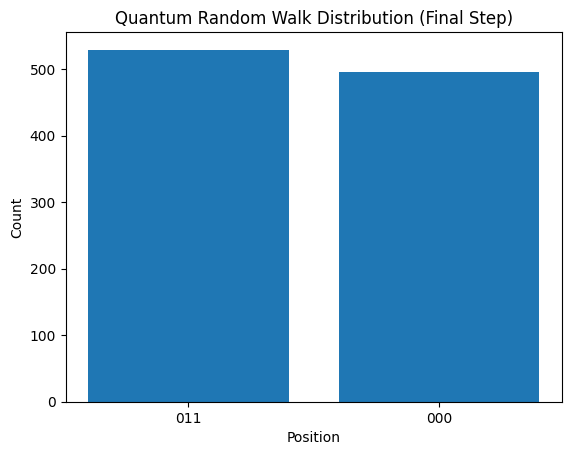

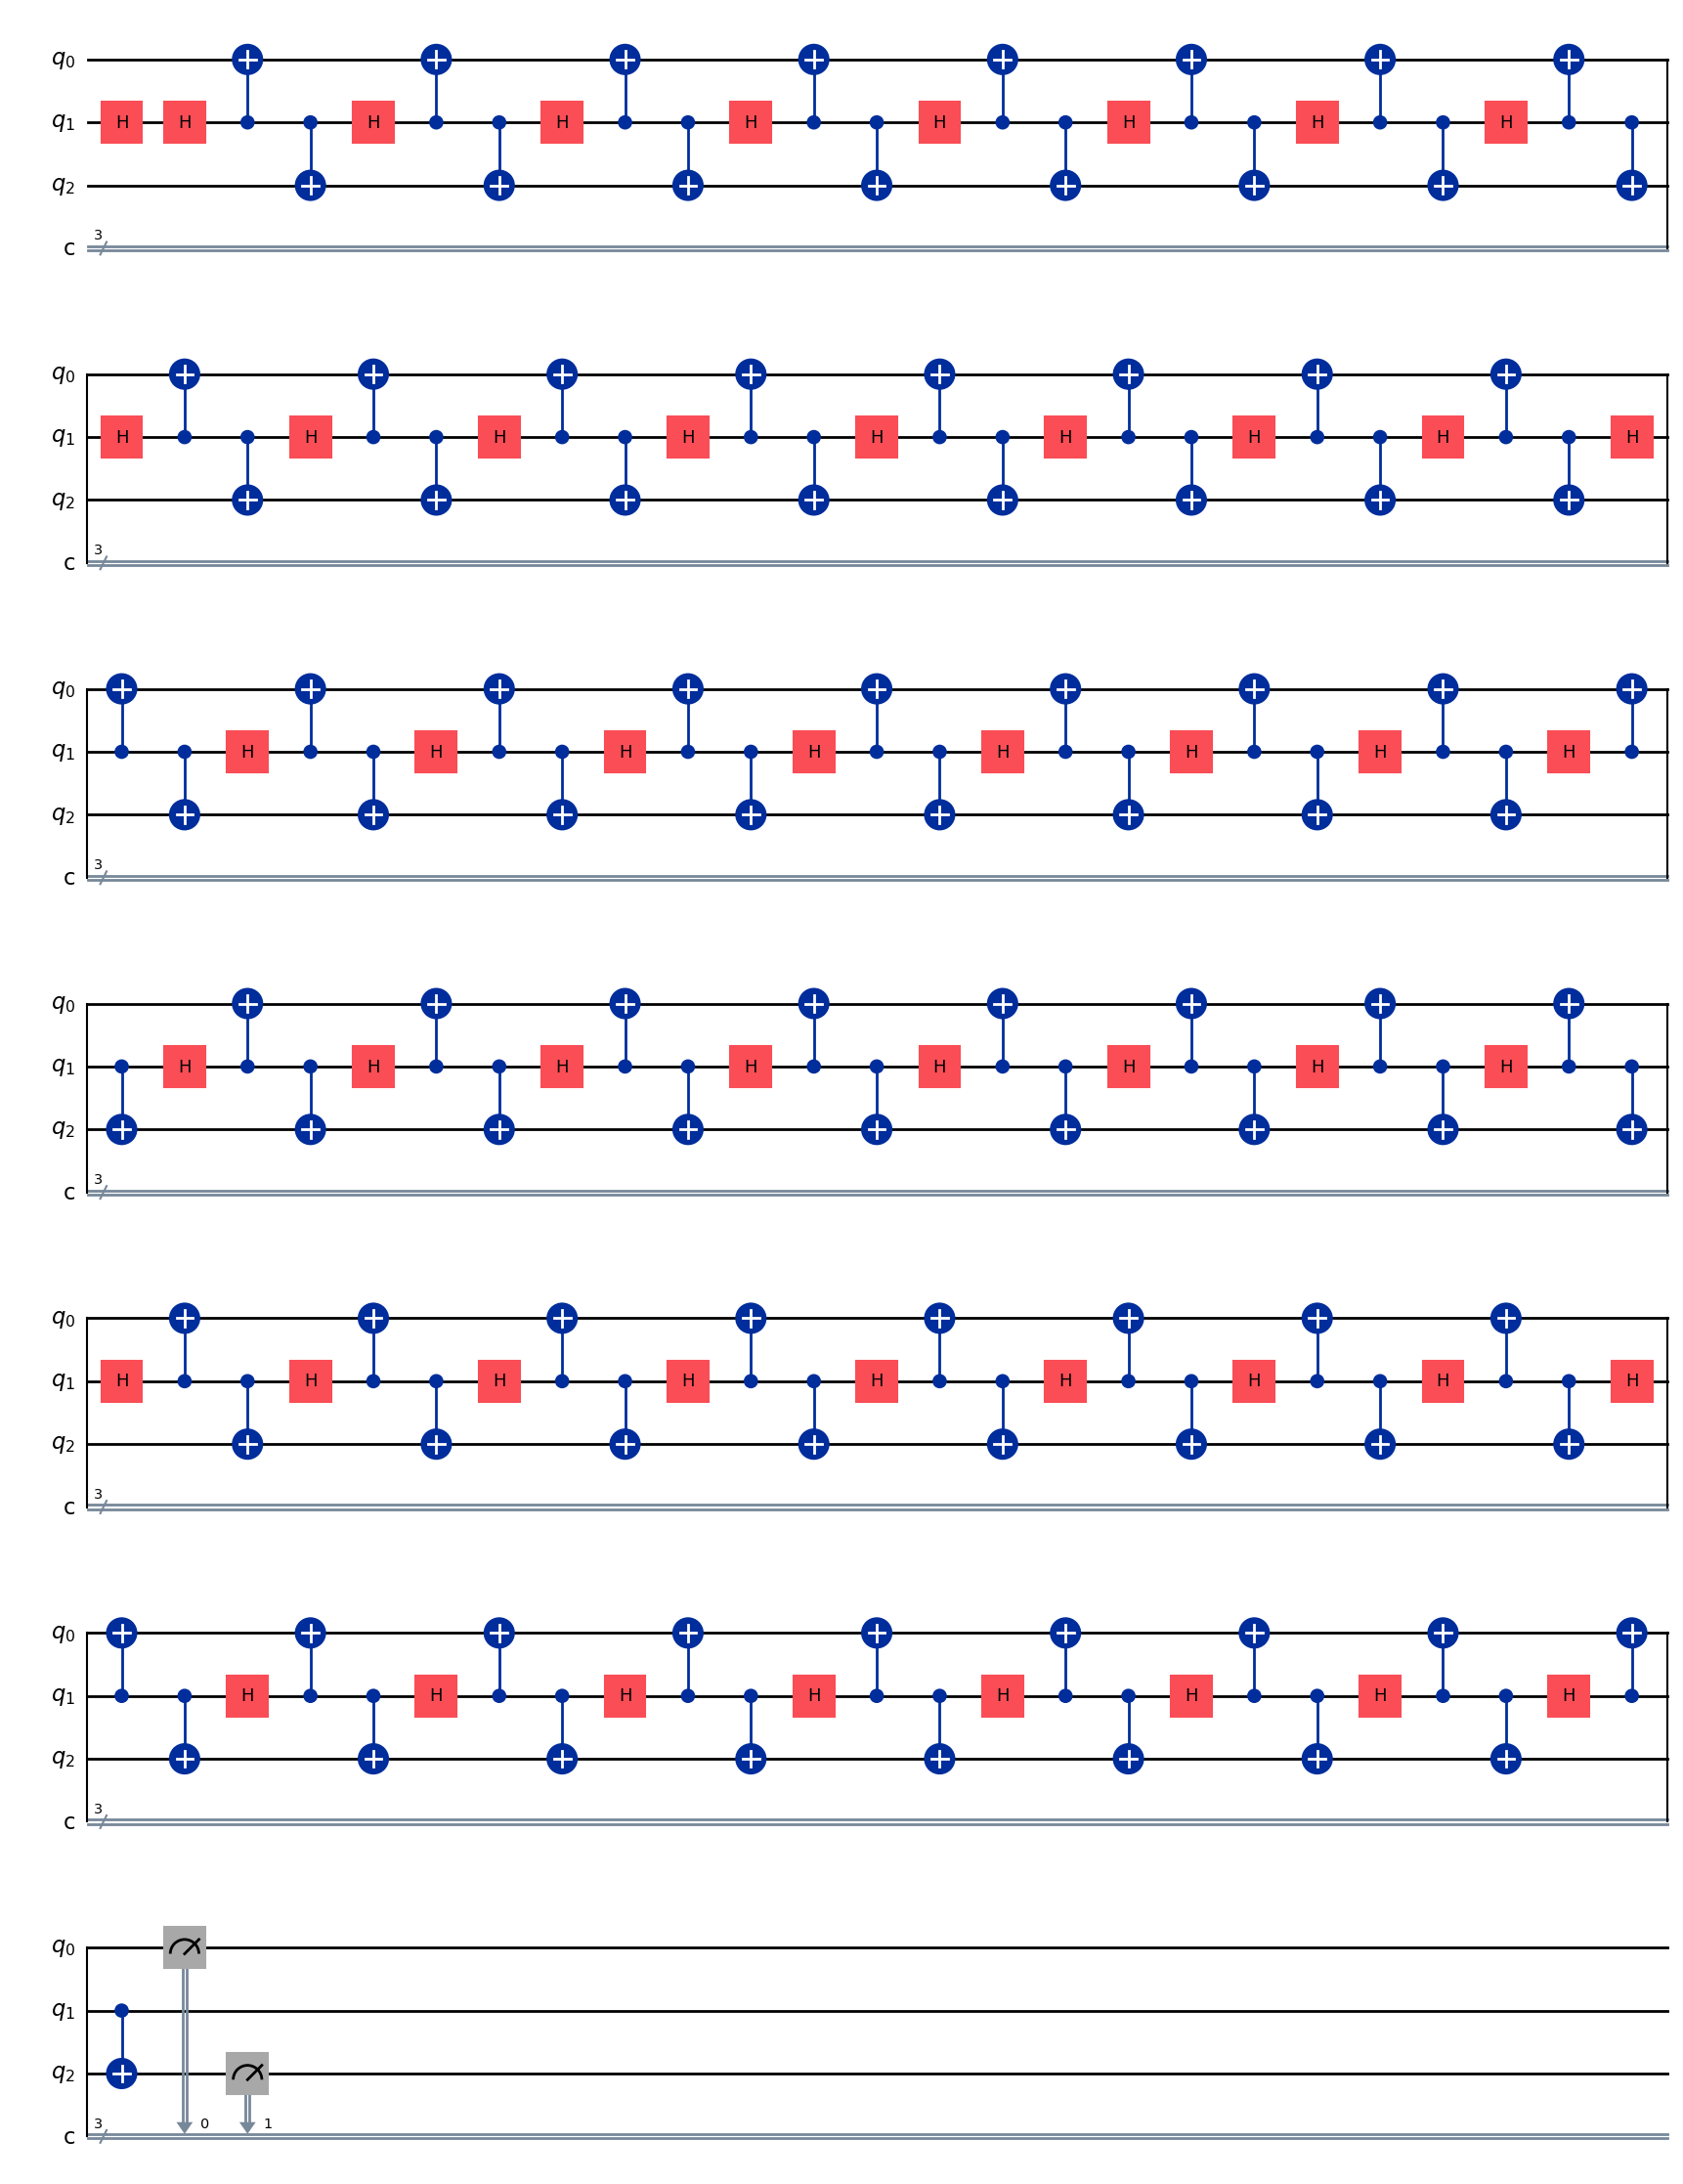

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

def quantum_random_walk(steps):
    qc = QuantumCircuit(3, 3)
    qc.h(1)
    
    for _ in range(steps):
        qc.h(1)
        qc.cx(1, 0)
        qc.cx(1, 2)

    qc.measure([0, 2], [0, 1])

    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()

    counts = result.get_counts()
    return counts,qc

steps = 50
final_counts,qc = quantum_random_walk(steps)

positions = list(final_counts.keys())
counts = list(final_counts.values())

plt.bar(positions, counts)
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Quantum Random Walk Distribution (Final Step)")
plt.show()
qc.draw('mpl')


### Quantum Random Walk

1. **Qubits and Circuit Setup:**
   - The quantum walk uses 3 qubits:
     - Two qubits represent the position of the walker (left and right).
     - One qubit represents the coin flip (used to decide whether to move left or right).
   - Initially, the quantum circuit is created with 3 qubits and 3 classical bits to store the measurement outcomes.

2. **Coin Flip (Hadamard Gate):**
   - The **Hadamard gate** (`qc.h(1)`) is applied to the coin qubit, which creates a superposition state. This means the coin qubit will be in a state where it has equal probability to be in state $|0\rangle$ (move right) or $|1\rangle$ (move left). This is the quantum version of the random choice.

3. **Random Walk (For Loop):**
   - For each step in the walk:
     - A Hadamard gate is applied again to the coin qubit to maintain its superposition.
     - The walker’s position is updated based on the coin flip:
       - If the coin qubit is $|1\rangle$, the walker moves left, which is represented by a **controlled-X gate** (`qc.cx(1, 0)`).
       - If the coin qubit is $|0\rangle$, the walker moves right, represented by another **controlled-X gate** (`qc.cx(1, 2)`).

4. **Measurement:**
   - After the random walk is complete, the positions of the walker (stored in the two position qubits) are measured.
   - These measurements are stored in classical bits, which will give the final outcome of the random walk for each step.

5. **Simulation:**
   - The quantum circuit is compiled and simulated using the **AerSimulator**, which runs the quantum circuit on a classical computer.
   - The simulation is run for 1024 shots (i.e., the random walk is repeated 1024 times to get a distribution of possible outcomes).

6. **Result Analysis:**
   - The measurement results are returned in the form of a dictionary, where the keys represent the positions (in binary form, for example, $00$, $01$, $10$, $11$), and the values represent how many times each position was measured in the simulation.
   
7. **Plotting:**
   - The results of the quantum random walk are plotted as a bar chart. The x-axis represents the possible positions (combined states of the position qubits), and the y-axis represents the number of times each position was reached after 1024 steps.

### Summary:
- The quantum random walk is based on the superposition and entanglement of qubits, which enables probabilistic movement of the walker.
- The quantum coin flip (via the Hadamard gate) controls the movement of the walker, while the controlled-X gates move the walker left or right based on the state of the coin qubit.
- The result is a probability distribution over possible positions of the walker, which is visualized in a bar chart after simulating the walk multiple times.
